In [1]:
#Import all necessary modules
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [2]:
df = pd.read_excel('Contraceptive_method_dataset.xlsx')


In [3]:
df.head(5)

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [4]:
df.tail()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
1468,33.0,Tertiary,Tertiary,NaN,Scientology,Yes,2,Very High,Exposed,Yes
1469,33.0,Tertiary,Tertiary,NaN,Scientology,No,1,Very High,Exposed,Yes
1470,39.0,Secondary,Secondary,NaN,Scientology,Yes,1,Very High,Exposed,Yes
1471,33.0,Secondary,Secondary,NaN,Scientology,Yes,2,Low,Exposed,Yes
1472,17.0,Secondary,Secondary,1.0,Scientology,No,2,Very High,Exposed,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wife_age,1402.0,32.606277,8.274927,16.0,26.0,32.0,39.0,49.0
No_of_children_born,1452.0,3.254132,2.365212,0.0,1.0,3.0,4.0,16.0
Husband_Occupation,1473.0,2.137814,0.864857,1.0,1.0,2.0,3.0,4.0


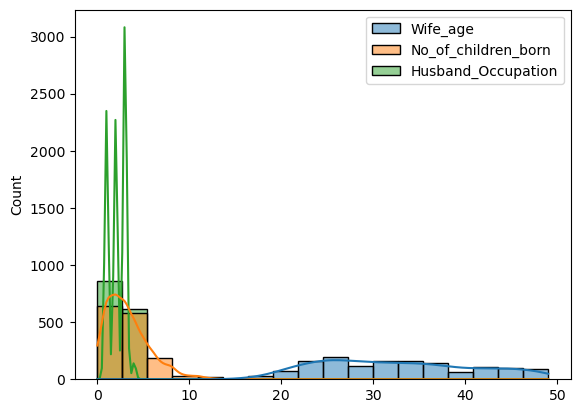

In [7]:
sns.histplot(data=df,kde=True);

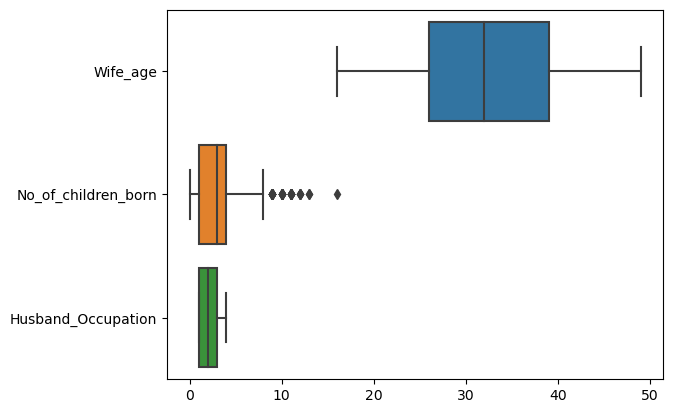

In [8]:
sns.boxplot(data=df, orient='h');

 

In [9]:
df.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [10]:
df.duplicated().sum()

80

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
cols = ['Wife_age','No_of_children_born']

for column in cols:
    print(column)
    median_1 = df[column].mode()[0]
    print(median_1)
    df[column].fillna(value=median_1,inplace=True)
    
df.isnull().sum()

Wife_age
25.0
No_of_children_born
2.0


Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

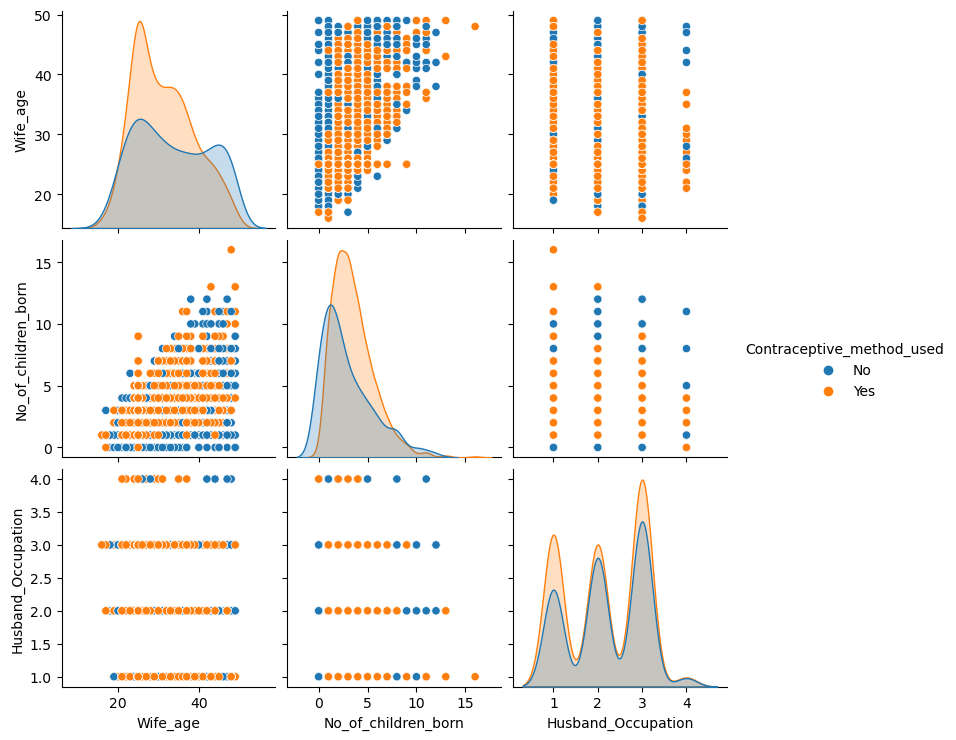

In [14]:
sns.pairplot(df,diag_kind='kde',hue='Contraceptive_method_used');

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1393 non-null   float64
 1   Wife_ education            1393 non-null   object 
 2   Husband_education          1393 non-null   object 
 3   No_of_children_born        1393 non-null   float64
 4   Wife_religion              1393 non-null   object 
 5   Wife_Working               1393 non-null   object 
 6   Husband_Occupation         1393 non-null   int64  
 7   Standard_of_living_index   1393 non-null   object 
 8   Media_exposure             1393 non-null   object 
 9   Contraceptive_method_used  1393 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 119.7+ KB


In [16]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range


In [17]:
lr,ur=remove_outlier(df['No_of_children_born'])
print("lower range",lr, "and upper range", ur)

lower range -5.0 and upper range 11.0


In [18]:
df['No_of_children_born']=np.where(df['No_of_children_born']>ur,ur,df['No_of_children_born'])
df['No_of_children_born']=np.where(df['No_of_children_born']<lr,lr,df['No_of_children_born'])

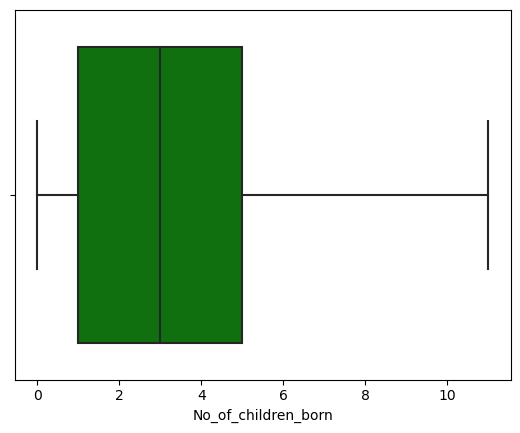

In [19]:
sns.boxplot(data=df,x='No_of_children_born',color='Green');

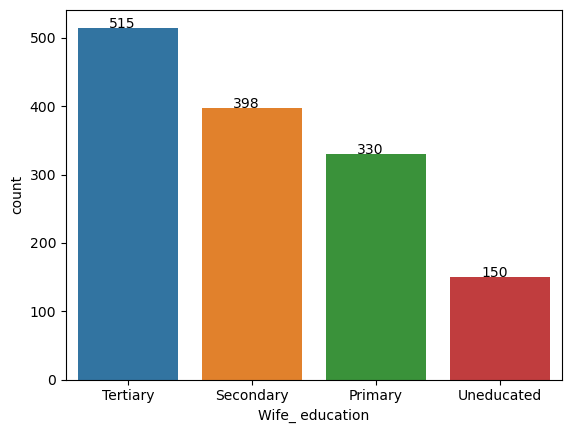

In [20]:
ax = sns.countplot(x="Wife_ education", data=df,  order = df['Wife_ education'].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.xticks(rotation=0)
plt.show()

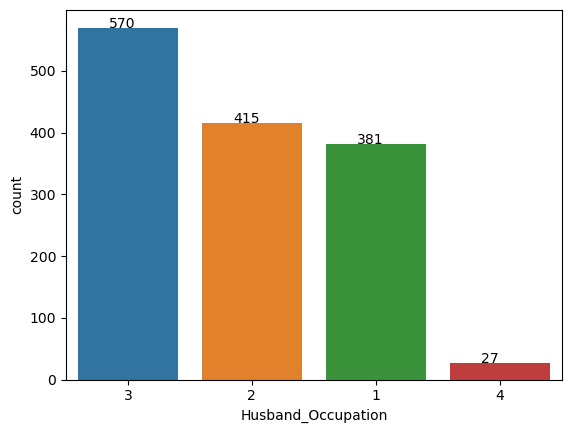

In [21]:
ax = sns.countplot(x="Husband_Occupation", data=df,  order = df['Husband_Occupation'].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.xticks(rotation=0)
plt.show()

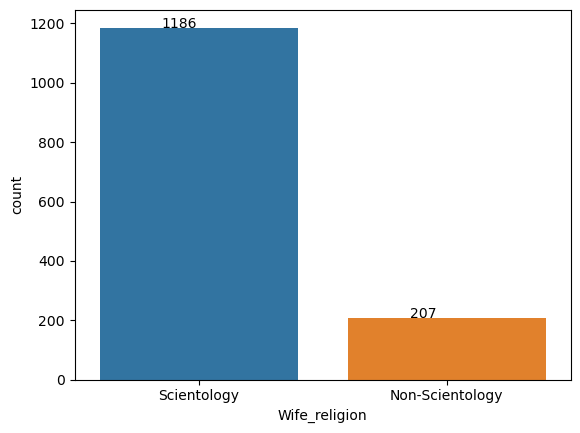

In [22]:
ax = sns.countplot(x="Wife_religion", data=df,  order = df['Wife_religion'].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.xticks(rotation=0)
plt.show()

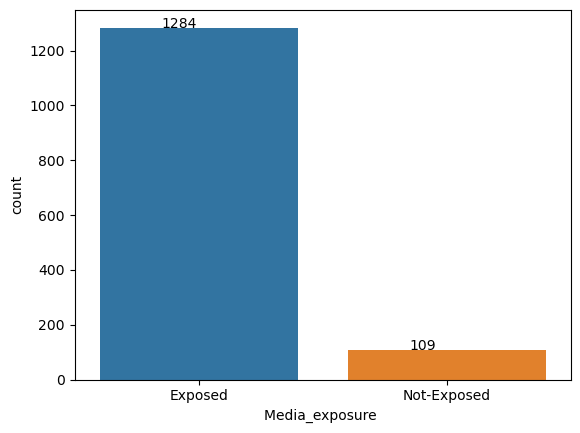

In [23]:
ax = sns.countplot(x='Media_exposure ', data=df,  order = df['Media_exposure '].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.xticks(rotation=0)
plt.show()

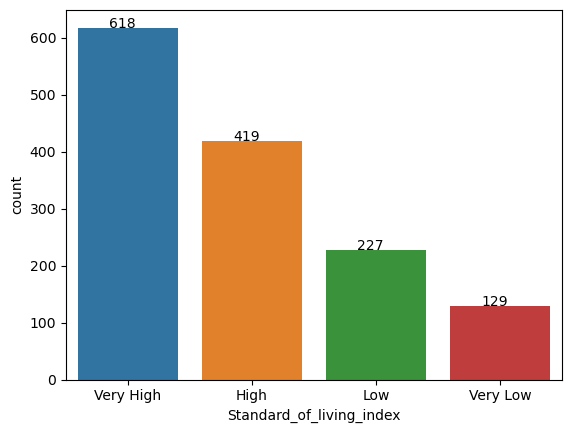

In [24]:
ax = sns.countplot(x="Standard_of_living_index", data=df,  order = df['Standard_of_living_index'].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.xticks(rotation=0)
plt.show()

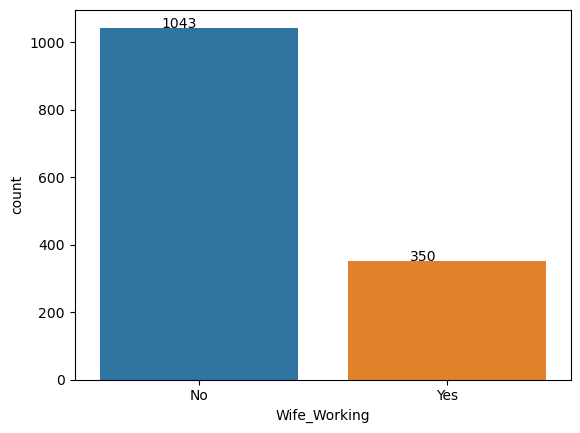

In [25]:
ax = sns.countplot(x="Wife_Working", data=df,  order = df['Wife_Working'].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.xticks(rotation=0)
plt.show()

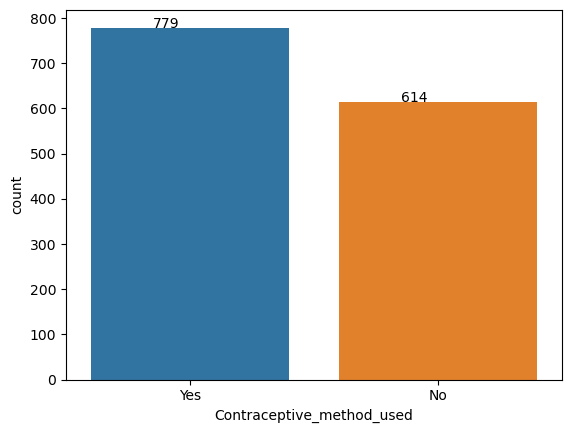

In [26]:
ax = sns.countplot(x="Contraceptive_method_used", data=df,  order = df['Contraceptive_method_used'].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.xticks(rotation=0)
plt.show()

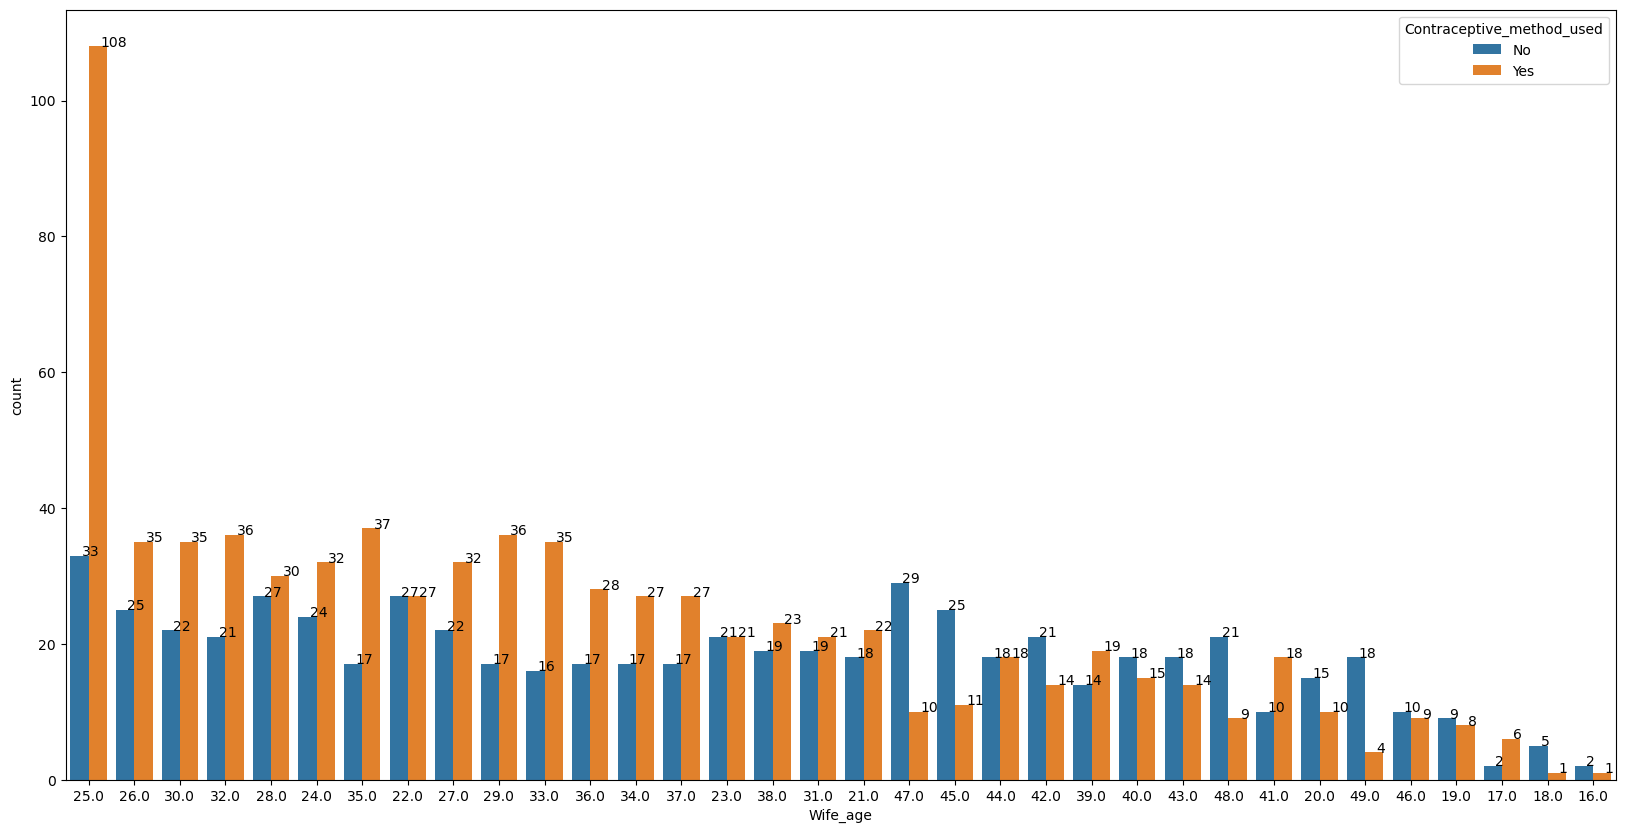

In [27]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="Wife_age", data=df,hue='Contraceptive_method_used' , order = df['Wife_age'].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.xticks(rotation=0)
#plt.figure(figsize=(10,10))
plt.show()

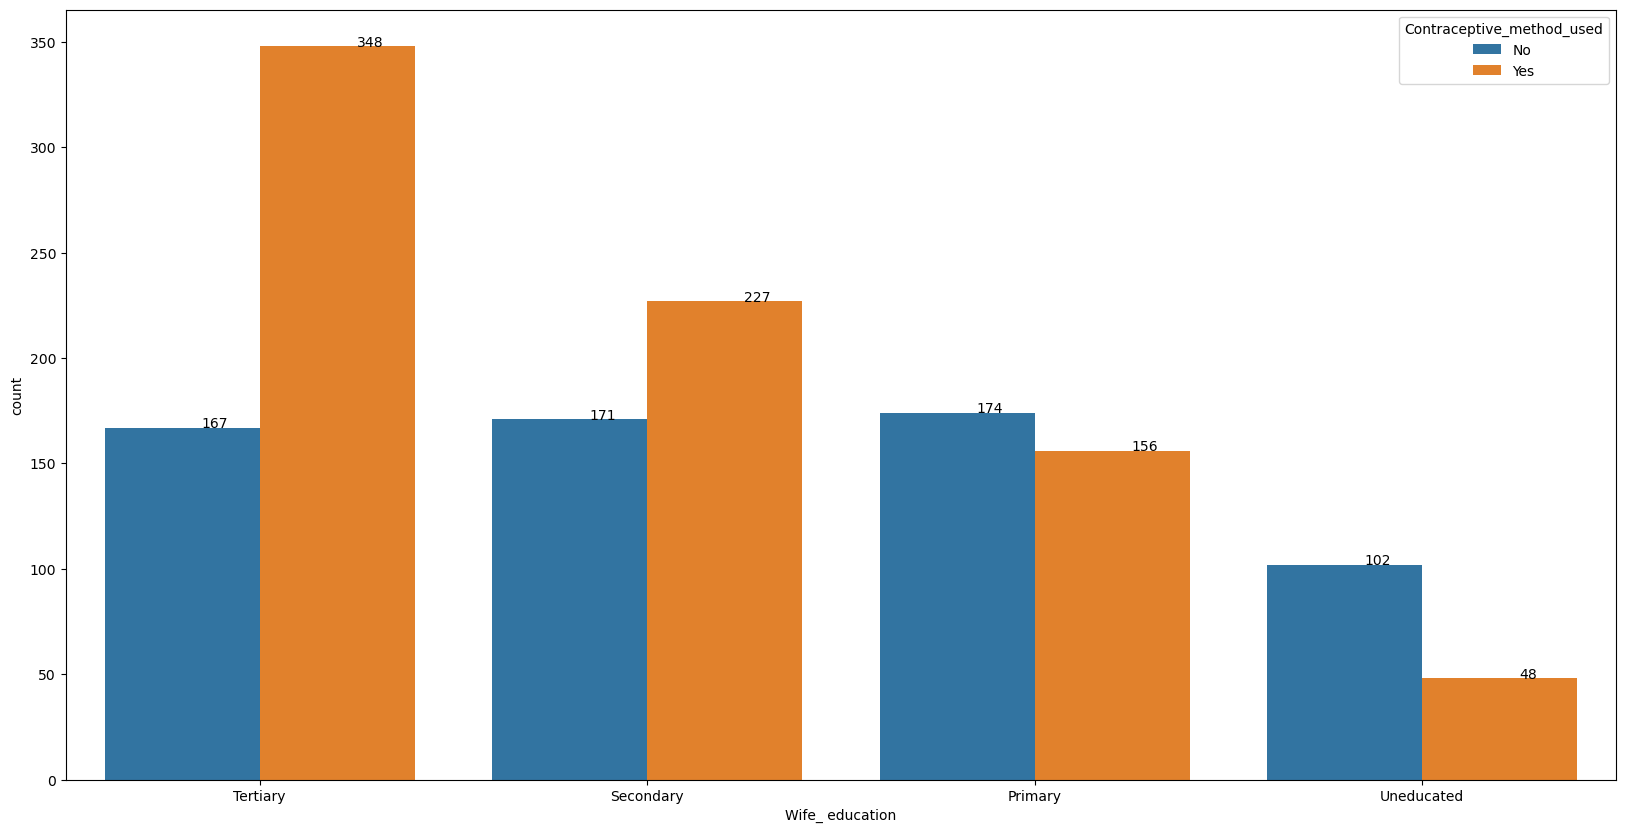

In [28]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="Wife_ education", data=df,hue='Contraceptive_method_used' , order = df['Wife_ education'].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.xticks(rotation=0)
#plt.figure(figsize=(10,10))
plt.show()

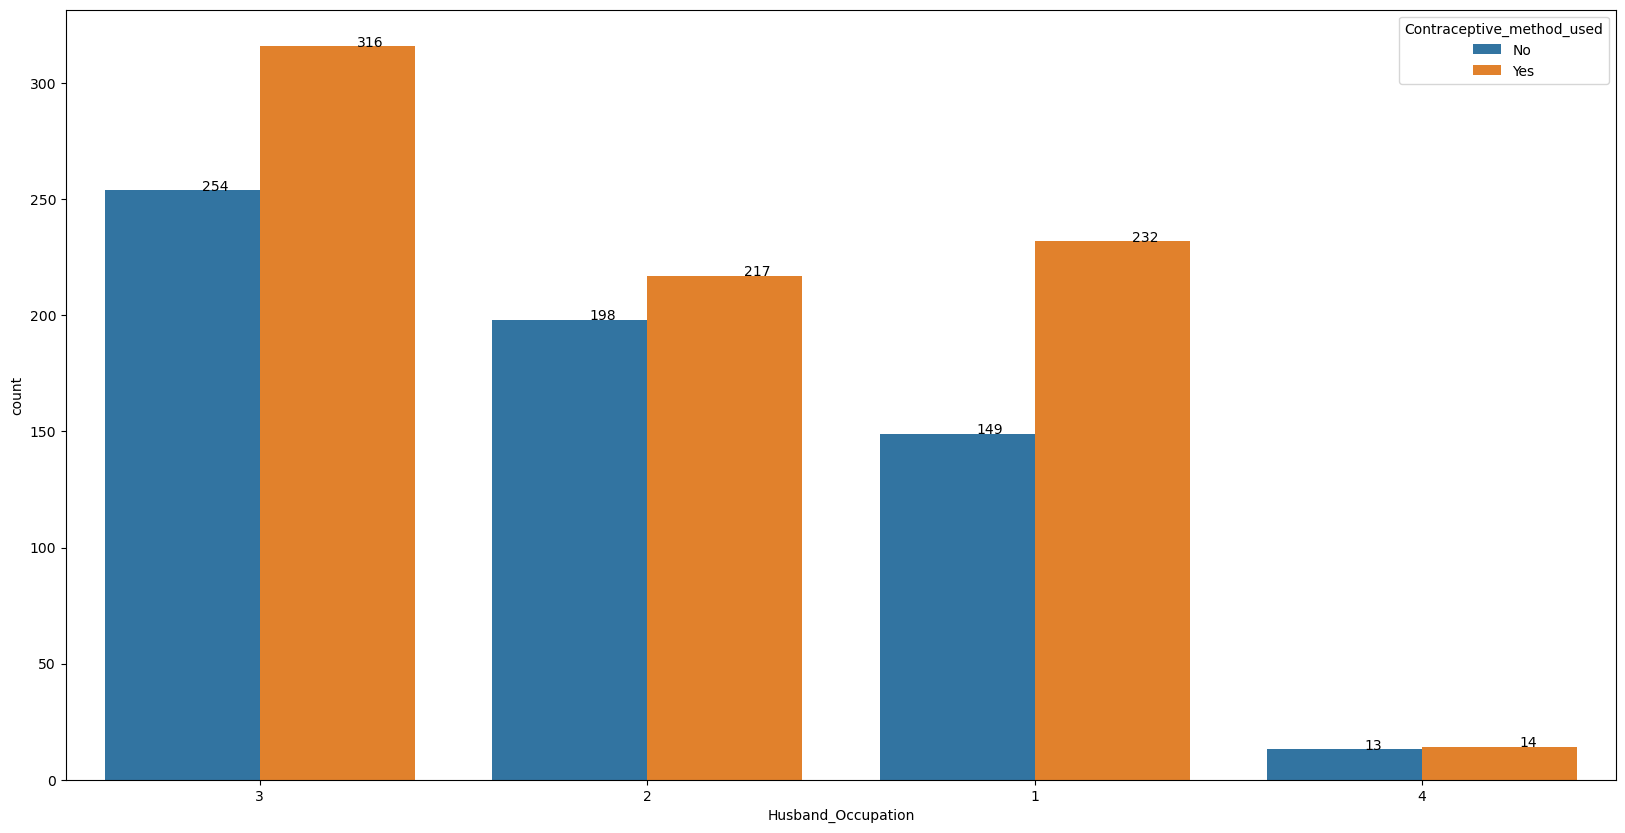

In [29]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="Husband_Occupation", data=df,hue='Contraceptive_method_used' , order = df['Husband_Occupation'].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.xticks(rotation=0)
#plt.figure(figsize=(10,10))
plt.show()

In [30]:
df['Contraceptive_method_used']=np.where(df['Contraceptive_method_used']=='Yes','0',df['Contraceptive_method_used'])
df['Contraceptive_method_used']=np.where(df['Contraceptive_method_used']=='No','1',df['Contraceptive_method_used'])
    

In [31]:
df['Contraceptive_method_used']=df['Contraceptive_method_used'].astype(int)

In [32]:
df['Contraceptive_method_used'].value_counts()

0    779
1    614
Name: Contraceptive_method_used, dtype: int64

In [33]:
# Encode the categorical variables
categorical_cols = ['Wife_ education', 'Husband_education', 'Wife_religion', 'Wife_Working', 'Standard_of_living_index','Media_exposure ']

In [34]:
encoded_data =pd.get_dummies(df,columns=categorical_cols,drop_first=True)
encoded_data.head()

,Wife_age,No_of_children_born,Husband_Occupation,Contraceptive_method_used,Wife_ education_Secondary,Wife_ education_Tertiary,Wife_ education_Uneducated,Husband_education_Secondary,Husband_education_Tertiary,Husband_education_Uneducated,Wife_religion_Scientology,Wife_Working_Yes,Standard_of_living_index_Low,Standard_of_living_index_Very High,Standard_of_living_index_Very Low,Media_exposure _Not-Exposed
0,24.0,3.0,2,1,0,0,0,1,0,0,1,0,0,0,0,0
1,45.0,10.0,3,1,0,0,1,1,0,0,1,0,0,1,0,0
2,43.0,7.0,3,1,0,0,0,1,0,0,1,0,0,1,0,0
3,42.0,9.0,3,1,1,0,0,0,0,0,1,0,0,0,0,0
4,36.0,8.0,3,1,1,0,0,1,0,0,1,0,1,0,0,0


In [35]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 1472
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Wife_age                            1393 non-null   float64
 1   No_of_children_born                 1393 non-null   float64
 2   Husband_Occupation                  1393 non-null   int64  
 3   Contraceptive_method_used           1393 non-null   int32  
 4   Wife_ education_Secondary           1393 non-null   uint8  
 5   Wife_ education_Tertiary            1393 non-null   uint8  
 6   Wife_ education_Uneducated          1393 non-null   uint8  
 7   Husband_education_Secondary         1393 non-null   uint8  
 8   Husband_education_Tertiary          1393 non-null   uint8  
 9   Husband_education_Uneducated        1393 non-null   uint8  
 10  Wife_religion_Scientology           1393 non-null   uint8  
 11  Wife_Working_Yes                    1393 no

In [36]:
# Copy all the predictor variables into X dataframe
X = encoded_data.drop('Contraceptive_method_used', axis=1)

# Copy target into the y dataframe. 
y = encoded_data['Contraceptive_method_used']

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [38]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [39]:
y_train.value_counts('%')

0    0.558974
1    0.441026
Name: Contraceptive_method_used, dtype: float64

In [40]:
y_test.value_counts('%')

0    0.559809
1    0.440191
Name: Contraceptive_method_used, dtype: float64

In [41]:
# Fit the Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [42]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [43]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.836241,0.163759
1,0.601548,0.398452
2,0.654378,0.345622
3,0.438634,0.561366
4,0.229667,0.770333


In [44]:
ytest_predict

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,

In [45]:
X_test

,Wife_age,No_of_children_born,Husband_Occupation,Wife_ education_Secondary,Wife_ education_Tertiary,Wife_ education_Uneducated,Husband_education_Secondary,Husband_education_Tertiary,Husband_education_Uneducated,Wife_religion_Scientology,Wife_Working_Yes,Standard_of_living_index_Low,Standard_of_living_index_Very High,Standard_of_living_index_Very Low,Media_exposure _Not-Exposed
749,23.0,2.0,3,0,1,0,0,1,0,1,0,0,1,0,0
748,35.0,4.0,1,1,0,0,0,1,0,1,0,0,1,0,0
782,40.0,4.0,1,0,1,0,0,1,0,1,0,0,1,0,0
1357,30.0,3.0,3,0,0,0,1,0,0,1,0,0,0,0,0
1175,22.0,1.0,3,0,0,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236,44.0,2.0,1,0,0,1,0,1,0,1,0,0,0,0,0
425,30.0,2.0,1,0,1,0,0,1,0,0,1,0,1,0,0
857,27.0,1.0,3,0,1,0,0,1,0,0,0,0,1,0,0
235,27.0,1.0,3,0,0,0,1,0,0,1,1,0,1,0,0


In [46]:
y_test

749     0
748     0
782     0
1357    0
1175    1
       ..
1236    0
425     0
857     0
235     1
174     1
Name: Contraceptive_method_used, Length: 418, dtype: int32

In [47]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.676923076923077

AUC: 0.718


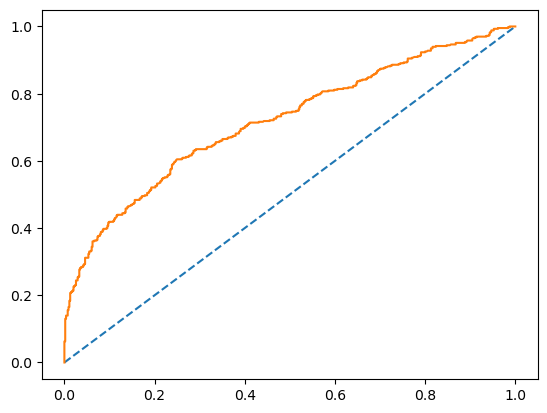

In [48]:
from sklearn.metrics import roc_auc_score,roc_curve
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [49]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.6339712918660287

AUC: 0.718


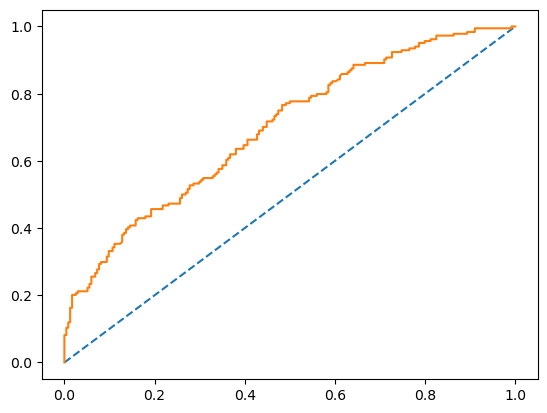

In [50]:
# predict probabilities

probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [51]:
from sklearn.metrics import confusion_matrix , classification_report
confusion_matrix(y_train, ytrain_predict)

array([[434, 111],
       [204, 226]], dtype=int64)

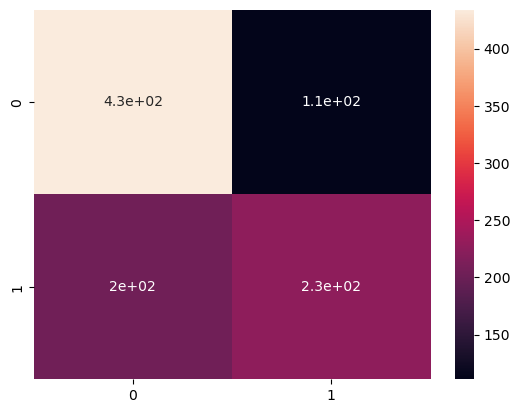

In [52]:
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True);

In [53]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.68      0.80      0.73       545
           1       0.67      0.53      0.59       430

    accuracy                           0.68       975
   macro avg       0.68      0.66      0.66       975
weighted avg       0.68      0.68      0.67       975



In [54]:
confusion_matrix(y_test, ytest_predict)

array([[167,  67],
       [ 86,  98]], dtype=int64)

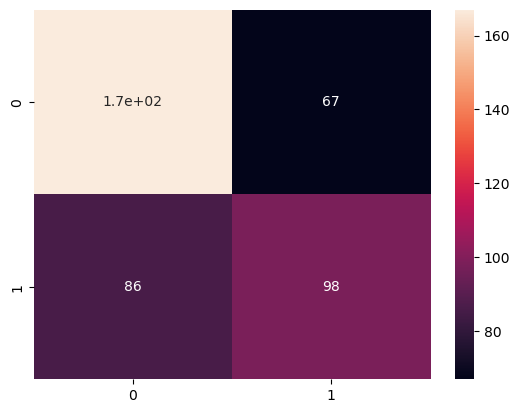

In [55]:
#plot_confusion_matrix(model,X_test,y_test);
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True);

In [56]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.66      0.71      0.69       234
           1       0.59      0.53      0.56       184

    accuracy                           0.63       418
   macro avg       0.63      0.62      0.62       418
weighted avg       0.63      0.63      0.63       418



In [57]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [58]:
model = LogisticRegression(max_iter=10000)

In [60]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [61]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [62]:
gridresultsdata=pd.DataFrame(grid_search.cv_results_)

In [63]:
gridresultsdata
# see how params is changing the params value as provided in param_grid,  also see Split0, split1, split 1 
#are the three CV fold outputs.  
# see rank_test_score is ranking the trials , and the best model is picked with rank 1 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_penalty,param_solver,param_tol,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.237573,0.070033,0.007368,0.002391,l2,sag,0.0001,"{'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001}",0.542751,0.554113,0.628571,0.575145,0.038062,4
1,0.495777,0.009660,0.014054,0.001509,l2,sag,0.00001,"{'penalty': 'l2', 'solver': 'sag', 'tol': 1e-05}",0.544776,0.547826,0.633094,0.575232,0.040933,1
2,0.126245,0.029074,0.009101,0.004232,l2,lbfgs,0.0001,"{'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0....",0.544776,0.547826,0.633094,0.575232,0.040933,1
3,0.132977,0.037322,0.010408,0.001039,l2,lbfgs,0.00001,"{'penalty': 'l2', 'solver': 'lbfgs', 'tol': 1e...",0.544776,0.547826,0.633094,0.575232,0.040933,1
4,0.323584,0.100536,0.009051,0.002918,none,sag,0.0001,"{'penalty': 'none', 'solver': 'sag', 'tol': 0....",0.522727,0.539130,0.630824,0.564227,0.047565,8
5,0.502789,0.106144,0.006981,0.001199,none,sag,0.00001,"{'penalty': 'none', 'solver': 'sag', 'tol': 1e...",0.528302,0.545455,0.625899,0.566552,0.042545,5
6,0.105548,0.021704,0.008839,0.001039,none,lbfgs,0.0001,"{'penalty': 'none', 'solver': 'lbfgs', 'tol': ...",0.528302,0.545455,0.625899,0.566552,0.042545,5
7,0.085996,0.017181,0.006020,0.002877,none,lbfgs,0.00001,"{'penalty': 'none', 'solver': 'lbfgs', 'tol': ...",0.528302,0.545455,0.625899,0.566552,0.042545,5


In [64]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)
# note that the rank 1 , is offering the combination of parameters , this is what is the best model 

{'penalty': 'l2', 'solver': 'sag', 'tol': 1e-05} 

LogisticRegression(max_iter=10000, solver='sag', tol=1e-05)


In [65]:
best_model = grid_search.best_estimator_

In [66]:
# Prediction on the training set using the best model

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [67]:
## Getting the probabilities on the test set using the best model

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.836181,0.163819
1,0.601480,0.398520
2,0.654626,0.345374
3,0.438781,0.561219
4,0.229054,0.770946


In [68]:
from sklearn.metrics import ConfusionMatrixDisplay

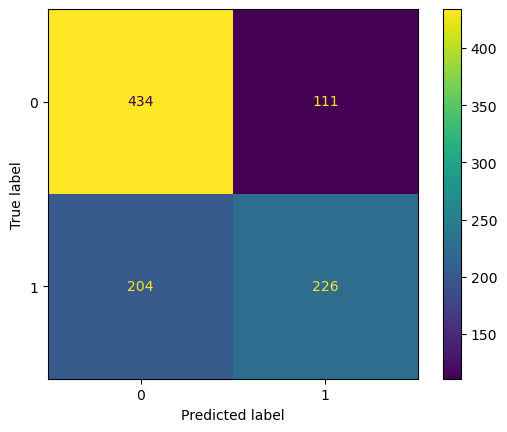

In [69]:
cmtrain=confusion_matrix(y_train,ytrain_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cmtrain,display_labels=best_model.classes_)
disp.plot();

In [70]:
## Confusion matrix on the training data


print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.68      0.80      0.73       545
           1       0.67      0.53      0.59       430

    accuracy                           0.68       975
   macro avg       0.68      0.66      0.66       975
weighted avg       0.68      0.68      0.67       975
 



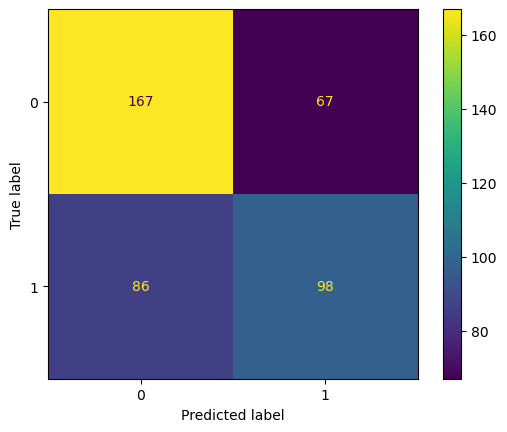

In [71]:
cmtest=confusion_matrix(y_test,ytest_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cmtest,display_labels=best_model.classes_)
disp.plot();

In [72]:
## Confusion matrix on the test data


print(classification_report(y_test, ytest_predict),'\n');

              precision    recall  f1-score   support

           0       0.66      0.71      0.69       234
           1       0.59      0.53      0.56       184

    accuracy                           0.63       418
   macro avg       0.63      0.62      0.62       418
weighted avg       0.63      0.63      0.63       418
 

